In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft 
from IPython.display import Audio 

## SS信号の生成
1. 周波数領域での設計
1. 逆フーリエ変換
1. 実部の取り出し
1. 円状シフト
1. 時間領域での信号が完成（可視化


### 周波数領域での設計
$$
\rm{upSS}(k)=\left \{
\begin{array}{}
e^{-j2\pi J(k/N)^2} & k = 0, 1, \cdots , N/2 \\ 
\rm{upSS}(N-k)^* & k = N/2+1, \cdots , N-1 \\
\end{array} \right.
$$

In [0]:
N = 2**16
J = N/2
k = np.arange(0,N/2,1)
up_ss = np.zeros(N, dtype = np.complex)
up_ss[1:int(N/2+1)] = np.exp(-1j*2*np.pi*J*((k/N)**2))
up_ss_firsthalf = up_ss[1:int(N/2-1)]
up_ss[int(N/2+2):N] = up_ss_firsthalf[::-1].conjugate()

### 逆FFT

In [0]:
up_ss_ifft = ifft(up_ss, n=N)

### 実部取り出し

In [0]:
up_ss_ifft_real = np.real(up_ss_ifft)

### 円状シフト

In [0]:
shift_length = int((N-J)/2)
up_ss_ifft_real_roll = np.roll(up_ss_ifft_real, shift_length)

### 完成！

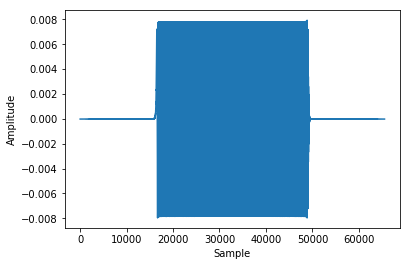

In [0]:
up_ss_signal = up_ss_ifft_real_roll

plt.plot(up_ss_signal)
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.show()

fs = 44100
Audio(up_ss_signal, rate = fs)

## 周波数領域でのdownSS信号

In [0]:
down_ss = np.zeros(N, dtype = np.complex)
down_ss[1:int(N/2+1)] = np.exp(1j*2*np.pi*J*((k/N)**2))
down_ss_firsthalf = down_ss[1:int(N/2-1)]
down_ss[int(N/2+2):N] = down_ss_firsthalf[::-1].conjugate()

## upSS信号とdownSS信号の畳み込み

1. 周波数領域での乗算
1. 逆フーリエ変換
1. 実部取り出し
1. 可視化

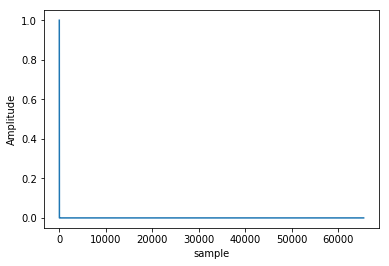

In [0]:
impulse_frequency = up_ss * down_ss
impulse_ifft = ifft(impulse_frequency)
impulse_ifft_real = np.real(impulse_ifft)

plt.plot(impulse_ifft_real)
plt.xlabel("sample")
plt.ylabel("Amplitude")
plt.show()